# The tip of the iceberg or Automatic for the people

**MOD510 - Project 1 G05**   
- Jing Hou
- Parthasarathi Jena

Date: Sep.08.2023

### Abstract: (is it accurate and informative)

### Introduction : (status of problem and major objectives)

In [9]:
# load libraries
import sys
import numpy as np
import math
import matplotlib.pyplot as plt

#%matplotlib

## Exercise 1: Finite-precision arithmetic
**Part 1**. Run the following code snippet:
- Explain the meaning of the printed-out numbers

In [12]:
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

This code provides the detailed information about float point numbers in 64-bit double-precision.

**max:** the maximum floating point value that it can represent  
**max_exp:** the maximum exponent of 2 that can be represented  
**max_10_exp:** the maximum exponent of 10 that can be represented  
**min:** the minimum floating point value that it can represent  
**min_exp:**  the minimum exponent of 2 that can be represented  
**min_10_exp:** the minimum exponent of 10 that can be represented  
**dig:** maximum number of decimal digits that can be represented in a float  
**mant_dig:** is maximum of significand including 1 bit of implicit value and 52 bits of fraction that can be represented  
**epsilon:** is machine precision that smallest relative approximation error due to floating point arithmetic.  
**radix:** 	the base of exponent representation  
**rounds:** the rounding mode used for arithmetic operations.  

**Part 2**. Show how you can calculate the printed-out values max, min, epsilon yourself (again, based on the IEEE standard).

IEEE 754 double-precision binary floating-pint format: float64

Sign bit = 1 bit
Exponent = 11 bits
significand precision = 53 bits (52 explicitly stored)

manual calculation shown as below:
- max: $(2-2^{-52})2^{1023}= 1.7976931348623157*10^{308}$
- min: $2^{-1022}= 2.2250738585072014*10^{-308}$
- epsilon= $2^{-52} = 2.220446049250313*10^{-16}$

Appendix A shows the code for procedurally calculating the same


**Part 3**. In Python, typing 0.1+0.2 does not (typically) produce the same output as 0.3. Why not?

In [13]:
a = 0.1 + 0.2
a == 0.3


False

That is due to binary system the computer use where the numbers are converting from decimal into the binary first. Both 0.1 and 0.2 (1/10 and 1/5 )are not representable in binary since floating-point numbers in computers are represented with finite numbers of bits. It then ends up with tiny precision errors

Appendix B shows how this can be computed with code. 


**Part 4**. Should you use the == operator to test whether two floating-point numbers are equal? Why / why not? Can you think of alternative ways to do floating-point number comparison?

No, you should avoid using this operator for testing two floating-point numbers are equal. Similarly to the problem above, the two floating numbers may not be representable in binary floating format in computer as the computer has finite numbers of bits to represent floating-point values and it may lead to tiny errors.

Alternative way is to check if the difference between two floating-point numbers is very small and close rather than checking for exact equality. The proposed of options are shown as below: 
 
 1. define equality function that check floating-point numbers are close enough so round-off errors become irrelevant  
 2. Use math.isclose function  
 

In [14]:
print('Is 0.1+0.2==0.3:', 0.1+0.2 == 0.3)  # check if equality holds
print('Difference: 0.3-(0.1+0.2) =', 0.3-(0.1+0.2))  # difference
epsilon = 2**-16
print(f'alternative method 1:::  Is 0.3-(0.1+0.2) < {epsilon}:', 0.3-(0.1+0.2) < epsilon) # alternative method 1
print('alternative method 2::: np.isclose(0.1+0.2, 0.3):', np.isclose(0.1+0.2, 0.3)) # alternative method 2

Is 0.1+0.2==0.3: False
Difference: 0.3-(0.1+0.2) = -5.551115123125783e-17
alternative method 1:::  Is 0.3-(0.1+0.2) < 1.52587890625e-05: True
alternative method 2::: np.isclose(0.1+0.2, 0.3): True


## Exercise 2: Get up to speed with NumPy

**Part 1**. The following code block gives an example of a vectorized function:

Notice the usage of np.exp instead of using the exponential function provided in the built-in math library; this is an example of a universal function.  
- Create a native Python list of the same size as x and holding the same values. Apply the same two function calls to the list. Explain what happens.
- How would you generally evaluate a function on all elements of a native Python list? (as opposed to a NumPy array)


In [15]:
x = np.linspace(0, 1, 10)
print(x)
print(np.exp(x)) # Apply f(t)=exp(t) to each element in the array x.
print(np.exp(-x)) # Apply the function f(t)=exp(-t) to each element of x.

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
[1.         1.11751907 1.24884887 1.39561243 1.5596235  1.742909
 1.94773404 2.17662993 2.43242545 2.71828183]
[1.         0.89483932 0.8007374  0.71653131 0.64118039 0.57375342
 0.51341712 0.45942582 0.41111229 0.36787944]


In [16]:
# use native python list for the same output
x1 = [i/9 for i in range(10)]
print(x1)

x2 = [math.exp(i) for i in x1]
print(x2)

x3 = [math.exp(-i) for i in x1]
print(x3)


[0.0, 0.1111111111111111, 0.2222222222222222, 0.3333333333333333, 0.4444444444444444, 0.5555555555555556, 0.6666666666666666, 0.7777777777777778, 0.8888888888888888, 1.0]
[1.0, 1.1175190687418637, 1.2488488690016821, 1.3956124250860895, 1.5596234976067807, 1.7429089986334578, 1.9477340410546757, 2.1766299317162483, 2.4324254542872077, 2.718281828459045]
[1.0, 0.8948393168143698, 0.8007374029168081, 0.7165313105737893, 0.6411803884299546, 0.5737534207374327, 0.513417119032592, 0.45942582403592663, 0.41111229050718745, 0.36787944117144233]


**Part 2**. As already hinted at, the NumPy library comes with a plethora of useful features and functions. The code snippets below show some examples:  
- Explain what each line of code does.
- How would you produce the same output using native Python lists?

In [17]:
print(np.zeros(20))
print(np.ones(20))
print(np.linspace(0, 10, 11))
print(np.linspace(0, 10, 11, endpoint=False))
vector = np.arange(5) + 1
print(vector)
print(2*vector)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[0.         0.90909091 1.81818182 2.72727273 3.63636364 4.54545455
 5.45454545 6.36363636 7.27272727 8.18181818 9.09090909]
[1 2 3 4 5]
[ 2  4  6  8 10]


The code by using numpy library gives us the output such below:

- array with 20 elements equal to zero   
- array with 20 elements equal to one  
- array with evenly spaced 11 elements in the range of 0 and 10, with the endpoint value in the range is included  
- array with evenly spaced 11 elements in the range of 0 and 10, with the endpoint value in the range is not included  
- array in the range of 0 and 5, add up 1 respectively  
- array with vector get multiplied by 2  

The same output by using native Python list is shown as below:



In [18]:
print([0 for i in range(20)]) # or [0]*20
print([1 for i in range(20)]) # or [1]*20
print([i for i in range(11)])
print([i/11*10 for i in range(11)])
print([i for i in range(1,6)])
print([i*2 for i in range(1,6)])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0.0, 0.9090909090909092, 1.8181818181818183, 2.727272727272727, 3.6363636363636367, 4.545454545454545, 5.454545454545454, 6.363636363636363, 7.272727272727273, 8.181818181818182, 9.09090909090909]
[1, 2, 3, 4, 5]
[2, 4, 6, 8, 10]


**Part 3**. Frequently you will want to extract a subset of values from an array based on some kind of criterion. For example, you might want to count the number of non-zero numbers, or identify all values exceeding a certain threshold. With NumPy, such tasks are easily achieved using boolean masking, e.g.

In [19]:
array_of_numbers = np.array([4, 8, 15, 16, 23, 42,0,5])
nnz = np.count_nonzero(array_of_numbers)
print(f'There are {nnz} non-zero numbers in the array.')
is_even = (array_of_numbers % 2 == 0)
is_greater_than_17 = (array_of_numbers > 17)
is_even_and_greater_than_17 = is_even & is_greater_than_17

There are 7 non-zero numbers in the array.


However, neither of the following codes lines will execute:    

- Explain why this code fails
- Use np.logical_and to make the code work

In [20]:
#error on executing the following codes 
#is_even_and_greater_than_17 = is_even and is_greater_than_17
#print(array_of_numbers % 2 == 0 & array_of_numbers > 17)

In [21]:
# suggested solutions
is_even_and_greater_than_17 = is_even & is_greater_than_17
print(is_even_and_greater_than_17)
print(((array_of_numbers % 2) == 0) & (array_of_numbers > 17)) 
print(np.logical_and((array_of_numbers % 2 == 0),(array_of_numbers > 17)))


[False False False False False  True False False]
[False False False False False  True False False]
[False False False False False  True False False]


The failure on this first part is due to the input is array structure and it happens when using logical operator AND on numpy array. and Bit-wise operator works fine is because numpy overloads the & operator to perform element-wise bitwise AND on arrays.

The second error is due to the operators precedence and orders issues. when we use bitwise operator & it will have lower precedence. It will be fixed when we add parentheses to group the input or use np.logical_and

**Part 4**. The function np.where can also be used to select elements from an array.
- Explain the output of the following two lines of code:

In [22]:
np.where(array_of_numbers > 17)[0]
#it returns the index of the array where the condition is satisfied

array([4, 5])

In [23]:
np.where(array_of_numbers > 17, 1, 0)
# it returns with an array where 1 condition is true and 0 where condition is false

array([0, 0, 0, 0, 1, 1, 0, 0])

## Exercise 3, Part I: Finite Differences (FD) with Functions

In scientific computing one often needs to calculate derivatives of functions. For problems encountered in practice, exact formulas may not be available, in which case numerical estimates are needed. However, to evaluate the correctness of our programmed numerical methods, it is still a very good idea to test the code on simple functions where the derivative is known. In this exercise, we consider a function that is relevant for describing wave phenomenona: $f(x) = sin(bx) · e^{−ax2}$ One way to implement the function in Python is:

In [24]:
def f(x, a=0.1, b=10):
    return np.sin(b*x)*np.exp(-a*x*x)

We have chosen to define a and b as default arguments, which allows us to evaluate the function at x = 1 by simply typing f(1); this is equivalent to the command f(1, 0.1, 10). If you want to change the b parameter, you can do, e.g., f(1, b=2). Note also that the function works both when x is a single number and when it is a Numpy array. This is because we use the Numpy versions of the sine (np.sin) and exponential (np.exp) functions. We will exploit this property of Python several times during this project.  

**Part 1**. It is always a good idea to start by visualizing the function in a plot.
- Make a Python function that plots f(x) from equation (1) over an arbitrary closed interval.
- Use the function to plot f(x) in the range [−10, 10]. Try to make your figure similar to the one shown in figure 1

In [25]:
def plot_func(f,start,end):
    
    dx= 0.01 # step size
    N = int((end-start)/dx) # number of points
    x = np.linspace(start, end, N)
    y = f(x)
    
    plt.plot(x,f(x),label='a Gaussian \nwave packet')
    plt.legend()
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Figure 1: A plot of $f(x)$',fontsize =10, y=-0.2)
    

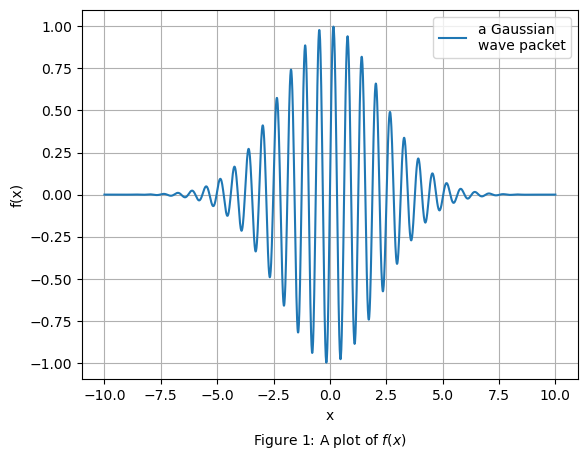

In [26]:
plot_func(f,-10,10)

**Part 2**. The analytical derivative of f(x) is $f'(x) = b cos(bx) · e^{−ax2} − 2ax sin(bx) · e^{−ax2}$  
- Write a Python function that calculates the derivative defined in equation (not the numerical derivative)

In [27]:
def analytical_derivative(x, a=0.1, b=10):
    return b*np.cos(b*x)*np.exp(-a*x*x)- 2*a*x*np.sin(b*x)*np.exp(-a*x*x)

**Part 3**. Next, you are going to write a Python function that calculates the numerical derivative of an *arbitrary* single-variable function f at a point x using finite differences.  
- Write a Python function that calculates the derivative of an arbitrary function using the forward difference method (see section 3.3 in [3] ).

- Apply your function to the particular case of equation (1) and x = 1. Use a suitable value of h, e.g. $h = 1e − 2$, and check that your estimate agrees reasonably well with the analytical solution.

In [28]:
def forward_diff(f, x, h,*args):
    return (f(x+h,*args)-f(x,*args))/h

In [29]:
x = 1
h = 1e-2

estimate = forward_diff(f,x,h)
analytical_solution = analytical_derivative(x)

In [30]:
print(f'The given point x = {x}, h = {h}')
print(f'Numerical value: {estimate}')
print(f'Analytical value: {analytical_solution}')
print(f'The difference of numerical value to the true analytical values is {np.abs(estimate-analytical_solution)}')
# Numerical derivative is close enough to analytical derivative, yet remain with slightly difference when h is not small enough

The given point x = 1, h = 0.01
Numerical value: -7.220096595246589
Analytical value: -7.493783027703379
The difference of numerical value to the true analytical values is 0.27368643245679003


**Part 4**.
- Write another Python function that calculates f'(x) with the central difference method (see section 3.4 in [3]).

In [31]:
def central_diff(f, x, h,*args):
    return 0.5*(f(x+h,*args)-f(x-h,*args))/h

**Part 5**. Next, we wish to quantify the error in our numerical derivative approximations for the point x = 1.  
- For each of the two derivative approximations to f'(1) (forward difference and central difference), make a scatter plot that shows the absolute error of the approximation on the y-axis versus the step size, h, on the x-axis. Include both error curves in the same figure. The step sizes should be varied logarithmically between $h = 10^{−16}$ and $h = 10^0 = 1$.
- Comment on what you observe in the figure you made. When is the numerical error smallest, and why? Is it what you expect from a theoretical
analysis using Taylor’s formula?

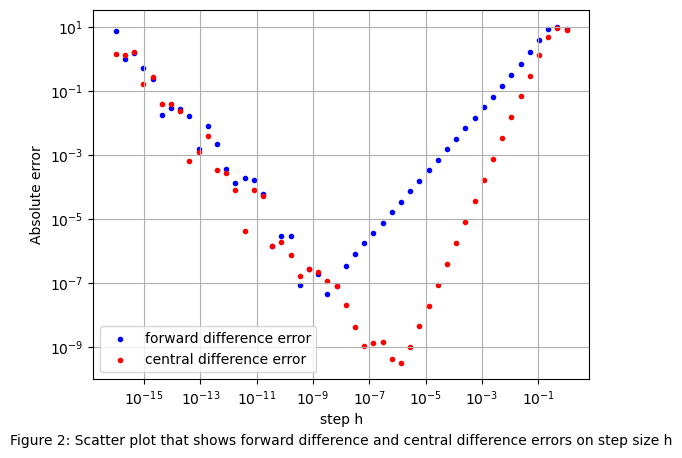

In [32]:
x = 1
h = np.logspace(-16,0) # step size

abs_error_forward = np.abs(forward_diff(f,x,h)- analytical_derivative(x))
abs_error_central = np.abs(central_diff(f,x,h)- analytical_derivative(x))

plt.scatter(h,abs_error_forward,label='forward difference error', c='b', marker='.')
plt.scatter(h,abs_error_central,label='central difference error', c='r', marker='.')
plt.legend()
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('step h')
plt.ylabel('Absolute error')
plt.title('Figure 2: Scatter plot that shows forward difference and central difference errors on step size h', fontsize =10, y=-0.2)
plt.show()

* Comment on what you observe in the figure you made. When is the numerical error smallest, and why? Is it what you expect from a theoretical analysis using Taylor’s formula?



From the taylor expansion of a arbitary function $f(x)$
the round off error for derivative by `forward difference`is given by  
$$f'(x) = \frac{f(x+h) -f(x)}{h} \pm \frac {2\epsilon|f(x)|}{h}-\frac {h}{2}f''(\eta)$$
$$R_2 = \frac {2\epsilon|f(x)|}{h}+\frac {h}{2}|f''(\eta)| $$

to minimize $R_2$ we differenciate with $dh$ and solving for $h$, we get:

$$h = \sqrt{\epsilon |f(x)/f''(x)|} \approx 2.10^{-8} $$

Similarly it can be shown that for `central difference` the step size $h \approx epsilon ^{3/2} \approx 10^{-6}$ 

In [36]:
print(f'The smallest numerical error for forward difference is {np.min(abs_error_forward):.6e} when h = {h[np.argmin(abs_error_forward)]:.6e}')
print(f'The smallest numerical error for central difference is {np.min(abs_error_central):.6e} when h = {h[np.argmin(abs_error_central)]:.6e}')

The smallest numerical error for forward difference is 4.470101e-08 when h = 3.237458e-09
The smallest numerical error for central difference is 3.326468e-10 when h = 1.325711e-06


## Exercise 3, Part II: FD with Classes

**Part 1**.
- Add a function (instance method) to the class that returns the forward difference approximation to the derivative of the function f at a point x. Include both x and the step-size h as input arguments to the function.  
- Add another second function which calculates the central difference approximation.

**Part 2**.
- Make a third class function that, for any input x, creates scatter plots showing the absolute error of the two finite difference approximations of f'(x) versus step size. As before, choose step sizes in the range from $10^{−16}$ to $1$ (with logarithmic spacing).
Hint: You should re-use the first two functions when making the third one.

In [37]:
class WavePacket:
    """ A class representation of a wave packet-function."""
    
    def __init__(self, a, b):
        self.a = a
        self.b = b
        
    def __call__(self, x):
        """A slightly more fancy class representation of a wave packet-function.
        In this version, we define the dunder (double-underscore) method __call__,
        which lets us treat objects of the class as if they were real functions! """
        
        return np.sin(self.b*x)*np.exp(-self.a*x*x)

    def analytical_derivative(self, x):
        return self.b *np.cos(self.b*x) * np.exp(-self.a*x*x)- 2 *self.a*x*np.sin(self.b*x)*np.exp(-self.a*x*x)
    
    def forward_diff(self, x, h):
        return (self.__call__(x+h)- self.__call__(x)) / h
    
    def central_diff(self, x, h):
        return 0.5*(self.__call__(x+h) - self.__call__(x-h))/ h

    def plot(self, x):
        '''scatter plot of absolute error of two difference versus step size h '''
        
        h = np.logspace(-16,0) # step size 
        
        abs_error_forward = np.abs(self.forward_diff(x,h)- self.analytical_derivative(x))
        abs_error_central = np.abs(self.central_diff(x,h)- self.analytical_derivative(x))
        
        plt.scatter(h,abs_error_forward,label='forward difference error', c='b', marker='.')
        plt.scatter(h,abs_error_central,label='central difference error', c='r', marker='.')
        plt.legend()
        plt.grid()
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel('step size h')
        plt.ylabel('Absolute error')


when x = 1, a = 0.1, b =2, the wavepacket value is 0.8227663359156917
when x = 1, a = 0.1, b = 10, the wavepacket value is -0.49225065733419177


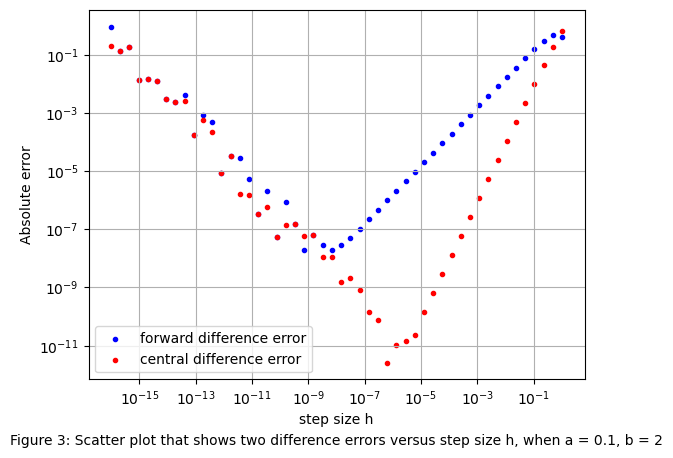

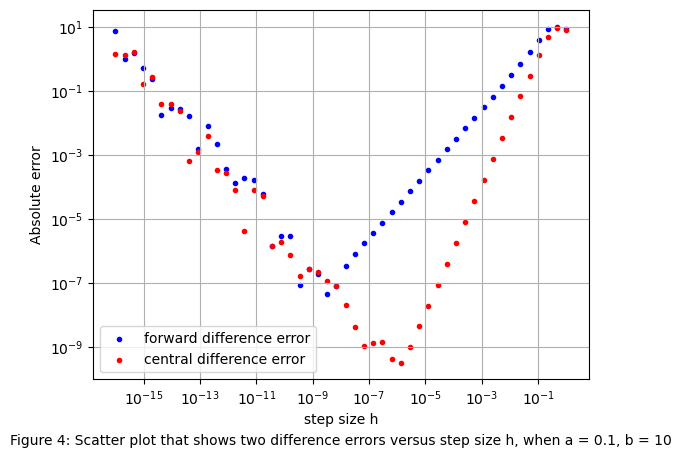

In [38]:
# Create two WavePacket objects, having their own parameter values
WP1 = WavePacket(0.1, 2) # a=0.1, b=2
WP2 = WavePacket(0.1, 10) # a = 0.1, b=10

# Evaluate the two functions at a specific point
x = 1

print(f'when x = 1, a = 0.1, b =2, the wavepacket value is {WP1(x)}')
print(f'when x = 1, a = 0.1, b = 10, the wavepacket value is {WP2(x)}')

# Plot the two functions
WP1.plot(x)
plt.title ('Figure 3: Scatter plot that shows two difference errors versus step size h, when a = 0.1, b = 2', fontsize =10, y=-0.2)
plt.show()
WP2.plot(x)
plt.title ('Figure 4: Scatter plot that shows two difference errors versus step size h, when a = 0.1, b = 10', fontsize =10, y=-0.2)
plt.show()

## Exercise 5: Automatic for the people?

**Part 1**.
- Add the following functions to your class, what happens when you do x+y? will allow you to get nice formatted output.

**Part 2**.In the code we have implemented + operator, however if you try to execute +x or -x, Python will give an error message TypeError: bad operand type for unary -: ’duple’.
- Extend your code to make it possible to perform those operations. (Hint:check out __neg__ and __pos__ in the documentation)
- Implement the - operator using __sub__, test that if you do x-y you get[-2,-2]

So far we have treated the function (top) and derivative (bottom) equally in terms of addition and subtraction. That is because addition and subtraction is a linear operation, i.e. $(f(x) + g(x))'= f'(x) + g'(x)$. For multiplication and division we have different rules

$(f(x) · g(x))' = f'(x) · g(x) + f(x) · g'(x)$    (11)

$(\frac{f(x)}{g(x)})' = \frac{f'(x) · g(x) − f(x) · g'(x)} {g(x)^2}$   (12)

**Part 3**.
- use the __mul__ function to implement the * operator, use normal multiplication for the top, and equation (11) for the bottom.
- use the __truediv__ function to implement the / operator, use normal division for the top, and equation (12) for the bottom.

In [40]:
class duple:
    '''Class for automatic differentiation 
    top: function value 
    bottom: derivative of function  '''

    def __init__(self,top, bottom=0):
        self.top = top
        self.bottom = bottom
        
    def __add__(self, d): # u+v, u'+v'
        return duple(self.top + d.top, self.bottom + d.bottom )
    
    def __neg__(self):    # -u, -u'
        return duple( -self.top,  -self.bottom)
    
    def __pos__(self):   # +u,  +u'
        return duple( +self.top, +self.bottom)
    
    def __sub__(self, d): # u-v, u'-v'
        return duple(self.top - d.top, self.bottom - d.bottom)
    
    def __mul__(self, d): # u*v,  u'*v + v'u
        return duple(self.top * d.top, self.bottom * d.top + self.top * d.bottom)
    
    def __truediv__(self, d): # u/v,  (u'* v - u* v')/ v^2
        return duple(self.top / d.top, ((self.bottom * d.top - self.top * d.bottom) / d.top**2))

    def __repr__(self):
        return "["+str(self.top)+","+str(self.bottom)+"]"
    
    def __str__(self):
        return "["+str(self.top)+","+str(self.bottom)+"]"

In [41]:
x= duple(1,2) #f(x)=1, f'(x)=2
y= duple(3,4) #g(x)=3, g'(x)=4
#x+y   #f(x)+g(x)=4, f'(x)+g'(x)=6

z = x+y

print('Formatted x+y:',z) # formatted output
print(f'-x: {-x};  +x :{+x}')
print('x-y :',x-y)

Formatted x+y: [4,6]
-x: [-1,-2];  +x :[1,2]
x-y : [-2,-2]


Test of code. Before proceeding to more advanced functions, we can actually do quite a lot with our small code and calculate derivatives of simple functions

In [42]:
x=1.2 # just for making it easy to use other values
One=duple(1.,0.) # derivative of a constant is zero
X=duple(x,1) # derivative of x with respect to x is 1
print("auto diff=",X*X*X)
print("analytical=",x*x*x, 3*x*x)
print("auto diff=", One/(One+X))
print("analytical=", 1/(1+x),-1/(1+x)**2)
Exp=duple(np.exp(x),np.exp(x)) # derivative of exp(x) is exp(x)
Sin=duple(np.sin(x),np.cos(x)) # derivative of sin(x) is cos(x)
print("auto diff=", Exp*Sin)
print("analytical=", np.exp(x)*np.sin(x), np.exp(x)*np.sin(x)+np.exp(x)*np.cos(x))

auto diff= [1.728,4.32]
analytical= 1.728 4.319999999999999
auto diff= [0.45454545454545453,-0.20661157024793386]
analytical= 0.45454545454545453 -0.20661157024793386
auto diff= [3.0944787419716917,4.297548854694511]
analytical= 3.0944787419716917 4.297548854694511


So far we have only implemented functions where we explicitly know the derivative, but it would be more convenient if we could implement more complicated functions, such as $ln(1+ex)$, without explicitly calculating the derivatives. Actually the only thing we need to do is to implement the kernel rule for the bottom part $f(g(x))' = f'(g(x)) · g'(x)$ (13)

**Part 4**. Finish the code below

In [44]:
class dfunction:
    
    def __init__(self, f, df):
        self.f = f
        self.df = df
        
    def __call__(self,d: duple): # kernel rule sending in and returning duple
        return duple(self.f(d.top), self.df(d.top)*d.bottom)
    

In [45]:
def f(x):
    return np.log(x)
def df(x):
    return 1/x
    
Log=dfunction(f,df) #note no arguments to f - we are passing the function
Exp=dfunction(np.exp,np.exp) # same here
print("auto diff ", Log(One+Exp(X)))
print("analytical ", np.log(1+np.exp(x)),np.exp(x)/(1+np.exp(x)))

auto diff  [1.4632824673380311,0.7685247834990176]
analytical  1.4632824673380311 0.7685247834990176


In [46]:
a=0.1
b=10
x=1
A=duple(a) #second argument is default 0 i.e. a constant
B=duple(b) #second argument is default 0 i.e. a constant
X=duple(x,1)

Sin = dfunction(np.sin, np.cos)
print("auto diff ", Sin(B*X)*Exp(-A*X*X))
print("analytical ", np.sin(b*x)*np.exp(-a*x*x),b*np.cos(b*x)*np.exp(-a*x*x)
-2*a*x*np.sin(b*x)*np.exp(-a*x*x))

auto diff  [-0.49225065733419177,-7.493783027703379]
analytical  -0.49225065733419177 -7.493783027703379


**Part 5**.
- Write a few sentences about the use of automatic differentiation in some areas
- Make some comments about the strength and weaknesses of automatic differentiation compared to numerical differentiation

Areas of application:
The automatic differentiation tool can be useful wherever gradient of a function needs to be computed. this can be useful in various feilds such as:
1. climate modelling. 
2. machine learning 
3. Finance.
3. Risk assessment 

The implemenation of automatic differentiation strengths :
1. prtty good accuracy: the results arrived at from the automatic differentiation (AD) has a very close match to the analytical solution. This was achieved using very basic operations. Finding the differencial of a funciton is independent of the stepsize chosen, in contrast to taylors expansion where the dereivative is dependent of step size and also gives an error propotional to stepsize
2. efficiency: the calculation time for computing differencials using AD is much less than those from first principals (for example using taylors expansion)
3. universal: we were able to implement  differenciation of arbitaty nested functions using our simple algorithm without needing to customize it. 


Weakness:
1. non intuitive: though the implementation of the AD algorithm was very simple, the formulation of the algorithm needs quiet a bit of thinking and is not intuitive to understand
2. can be complex for high dimentional problems: in this exercise we implemented basic functions (log, exp, sin, cos). It is possible the ease of implementation is not so straight forward when considering very complex and nested functions 



Ref

---------------

**Reflections**:
how did you work, what did you learn? what will you do differently next time? critical comments on the exercise itself. what did work and what did not work, and why?

- Jing: 

- Partha:

**Conclusion**: what was learned about the methods used, and from the results obtained? possible directions and future improvements? 

# APPENDIX 1

Show how you can calculate the printed-out values max, min, epsilon yourself

According to the IEEE 754-1985 standard for a 64bit computer 
1. 1 bit is reserved for the sign of the float (sign bit), say a
1. 52 bits are used to represent the fraction of the float, say b
1. 11 bits are used to represent exponenet  of the float, say c
1. in addition float is represented in the normalized fashion, that is to say 1. is always assumed to be the first digit of the fraction
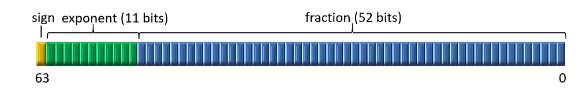

Each bit can either be 0 or 1.

For calculating the decimal number from the bit values the following formula can be used

$\pm M\cdot2^{E-e}$

$M=1.F$

where M is the mantissa E is the exponent and e is the bias. Bias, e, has a fixed value $(2^{11-1}-1=1023), 0<E<2^{2^{11}-2}$. Ehe exponenet $E$ has two less possibilities as `00000000000` and `11111111111` are reserved to represent to represent $0$ and $\infty $. In combination with the sign bit, they can also represent $-0$ and $-\infty$

**Calculating the max, min,  epsilon**

The code below calculates the maximum, min and epsilon. 


In [1]:
def calcdecfrombinary(F, E, signbit =0, e=2**10-1, mp =False):
    # lets ignore the sign bit for the moment 
    # the frac is 51 bits
    # exp is 11 bits
    
    def fractodec(F):
        div = 2
        dec =0
        for digit in F:
            dec += int(digit)/div
            div = div*2
        #print('F=',dec)
        return(dec)
    
    def exptodec(E):
        mul = 1
        dec =0
        for digit in list(E)[::-1]:
            dec += int(digit)*mul
            mul = mul*2
        #print('E =',dec)
        return(dec)
    
    M = 1+fractodec(F)
    
    if mp :
        E1 =e
    else:
        E1 = exptodec(E)
    m =2**(E1-e) 
    #print('m =',m,'(E1-e): ',(E1-e))
    number = M*m
    print(f'F =[{F}](binary), {M-1}(decimal), \nM = 1+F ={M}(decimal) \nE = [{E}](binary), {E1}(decimal)')
    return(number)

In [2]:
print('Decimal equivalent of a binary number is given by(ignoring the sign bit)')
print(f'M*2^(E-e), e is the bias, a constant(={2**10-1})' )
print('M = 1.F)\n' )

print('Maximum number possible to store')
print('='*80)
F='1'*52
E='1'*10+'0' # the last bit is to be 0 since 11 bits of all 1 represents infinity
print (f'Biggest number: {calcdecfrombinary(F,E)}')
print('\n')

print('Min positive number possible to store')
print('='*80)
F='0'*52 # all bits of fraction are 0
E='0'*10+'1' # the last bit is to be 1 since 11 bits of all 0 represents one
print (f'smallest number: {calcdecfrombinary(F,E)}')
print('\n')

print('Calculating machine precision')
print('='*80)
print('To represent 1, the both fraction, F, and Exponent, E-e, is all zeros ')
print('To represent number just higher than 1, the both fraction, F, is 51x0s followed by 1 ')
print('and Exponent, E-e, is all zeros => E=e')
F='0'*51+'1' 
E='1'*10 # equal to bias, e
epsilon = 1-calcdecfrombinary(F,E)
print (f'calculated machine precision: {epsilon}')
print('\n')

Decimal equivalent of a binary number is given by(ignoring the sign bit)
M*2^(E-e), e is the bias, a constant(=1023)
M = 1.F)

Maximum number possible to store
F =[1111111111111111111111111111111111111111111111111111](binary), 0.9999999999999998(decimal), 
M = 1+F =1.9999999999999998(decimal) 
E = [11111111110](binary), 2046(decimal)
Biggest number: 1.7976931348623157e+308


Min positive number possible to store
F =[0000000000000000000000000000000000000000000000000000](binary), 0.0(decimal), 
M = 1+F =1.0(decimal) 
E = [00000000001](binary), 1(decimal)
smallest number: 2.2250738585072014e-308


Calculating machine precision
To represent 1, the both fraction, F, and Exponent, E-e, is all zeros 
To represent number just higher than 1, the both fraction, F, is 51x0s followed by 1 
and Exponent, E-e, is all zeros => E=e
F =[0000000000000000000000000000000000000000000000000001](binary), 2.220446049250313e-16(decimal), 
M = 1+F =1.0000000000000002(decimal) 
E = [1111111111](binary), 1023(dec

# Appendix B



In [3]:
class binNbit():
    '''
    class that takes a number a and 
    1. calculates the binary equivalent
    2. converts this binary equivalent to decimal 
    3. checks if the reverse conversion produces the same output
    this only works with +ve numbers below 1 for now.
    '''
    def __init__(self, a, n=16):
        self.n = n
        self.a = a
        self.bin = ''
        self.dec = 0.0
    def dec2bin(self):
        '''
        calculated the binary of number a with n bits of precision after decimal 
        (a)decimal = b(binary)
        b is of the form 0.xxxxxx... (n number of x's)
        n is the number of bits used for binary representation
        '''
        # To avoid the decimal separator, multiply the decimal number 
        # with the base raised to the power of decimals in result
        n = self.n
        a = int(self.a*2**n)
        #print(a)
        div = 2
        quotent = a
        reminder = ''

        for i in range(n):
            quotent = a//div
            reminder = str(int(a%div))+reminder
            #print(f'{a}/2',quotent, reminder, i)
            a=quotent
        self.bin = ('0.'+reminder)
        return(self.bin)
    
    def bin2dec(self ):
        '''
        calculated the decimal equivalent of a binary number b  
        (b)decimal = d(binary)
        b  is a string of the form 0.xxxxxx 
        '''
        # remove the decimal point
        b = self.bin[0]+self.bin[2:]
        div = 1
        dec =0
        for digit in b:
            dec += int(digit)/div
            div = div*2
        self.dec = dec
        return(self.dec)
    
    def __call__(self):
        
        self.dec2bin()
        self.bin2dec()
        return('there and back again : done')
    
    def issame(self):
        '''
        check the accuracy of the conversion
        '''
        if self.a == self.dec:
            return(f'decimal input {self.a} is equal machine decimal representation {self.dec}')
        else:
            return(f'decimal input {self.a} is *NOT* equal machine decimal representation {self.dec}')     
        
    def __repr__(self):
        ''' 
        represntation of the class
        '''
        self()
        return(f'input: {self.a}, {self.n} bit binary equiv: {self.bin}, decimal equiv:{self.dec}')

In [7]:
p = binNbit(0.2,8)
q = binNbit(0.2,16)

p, q

(input: 0.2, 8 bit binary equiv: 0.00110011, decimal equiv:0.19921875,
 input: 0.2, 16 bit binary equiv: 0.0011001100110011, decimal equiv:0.1999969482421875)

In [5]:
p.issame(), q.issame()

('decimal input 0.2 is *NOT* equal machine decimal representation 0.19921875',
 'decimal input 0.2 is *NOT* equal machine decimal representation 0.1999969482421875')

**Discussion:**

The above class takes a decimal number, $a$,  and the number of bits, $n$, that is to be used to represent in binary. It converts the *raw decimal* to its binary equivalent, $bin$, representing it in $n$ bits after decimal place. The class also converts the binary representation $bin$ back to decimal representation, $dec$. 

The class function `issame` tells us if the *raw decimal*  has been faithfully converted

When converting 0.2 to binary we get 0.0011(0011)...(repeting). Some part of 0.2 is always lost by truncation when converting to binary. With increased number of bits used to represent the decimal the precision is increased but it is impossible to reach 0.2 with finite number of bits. Thus 0.1 + 0.2 can never be equal to 0.3.

**References**:  
[1] [Information about sys float info 2023](https://note.nkmk.me/en/python-sys-float-info-max-min/#detailed-information-about-float-sysfloat_info)  
[2] [IEEE 754 - 1985](https://en.wikipedia.org/wiki/IEEE_754-1985)  
[3] [IEEE 754 standard](https://en.wikipedia.org/wiki/IEEE_754)  
[4]  Aksel Hiorth. *Computational Engineering and Modeling*. https://github.com/ahiorth/CompEngineering, 2023  
[5] Peter Fretwell, Hamish D. Pritchard, David G. Vaughan, Jonathan L. Bamber, Nicholas E. Barrand, R. Bell, C. Bianchi, RG Bingham, Donald D.  
Blankenship, and G. Casassa. Bedmap2: Improved ice bed, surface and thickness datasets for antarctica. The Cryosphere, 7(1):375–393, 2013.  

[6] Peter D. Noerdlinger and Kay R. Brower. The melting of floating ice raises the ocean level. *Geophysical Journal International*, 170(1):145–150, 2007.

[7] Robert Edwin Wengert. A simple automatic derivative evaluation program. Communications of the ACM, 7(8):463–464, 1964.